target
two files:
1. fruits
2. commute

fruits
銷售情況 to fruits
業績分析 to 人

images...
description with conclusion

commute
交通事故簡報資料

images...
description with conclusion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 設定matplotlib字型
plt.rc('font', family='Microsoft JhengHei')  

# the data starts from the third row and the second row is actually its header
data = pd.read_excel('B2-4 交通事故資料.xlsx', header=2)

data.head()

,發生時間,發生地點,死亡受傷數,車種
0,106年01月01日 02時35分,臺東縣長濱鄉樟原村樟原94號旁(附近)台11線74公里000公尺處東向外側車道,死亡1;受傷0,普通重型-機車
1,106年01月01日 02時43分,新北市板橋區環河西路4段前0公尺數華江六路路口,死亡1;受傷0,普通重型-機車
2,106年01月01日 03時35分,桃園市大溪區復興路文化路(口)口(附近),死亡2;受傷0,普通重型-機車;計程車-小客車;自用-小客車;普通重型-機車;普通重型-機車
3,106年01月01日 06時09分,高雄市前金區村七賢二路前0公尺數瑞源路口路口,死亡1;受傷0,普通重型-機車;行人-人
4,106年01月01日 06時25分,新竹縣竹北市竹義街76巷,死亡1;受傷0,普通重型-機車;行人-人


In [2]:
df = pd.DataFrame()

# 提取時間信息
df['月份'] = data['發生時間'].str.split('年').str[1].str.split('月').str[0].astype(int)
df['小時'] = data['發生時間'].str.split(' ').str[1].str.split('時').str[0].astype(int)

# 提取地區信息
df['地區'] = data['發生地點'].str.split('市|縣|區|鄉|鎮').str[0]

# 提取死亡人數
df['死亡人數'] = data['死亡受傷數'].str.split('死亡').str[1].str.split(';').str[0].astype(int)

# 提取受傷人數
df['受傷人數'] = data['死亡受傷數'].str.split('受傷').str[1].str.split(';').str[0].astype(int)

# 車種 
df['車種'] = data['車種']

df.sample(5)

,月份,小時,地區,死亡人數,受傷人數,車種
286,3,11,臺北,1,1,普通重型-機車;行人-人
111,1,15,新竹,1,0,其他特種車-特種車;普通重型-機車;自用-小客車
33,1,20,屏東,1,0,計程車-小客車;普通重型-機車
388,4,17,彰化,1,1,自用-大貨車;自用-小貨車;其他人-人;其他人-人
336,4,22,金門,1,1,普通重型-機車;自用-小貨車;普通重型-機車


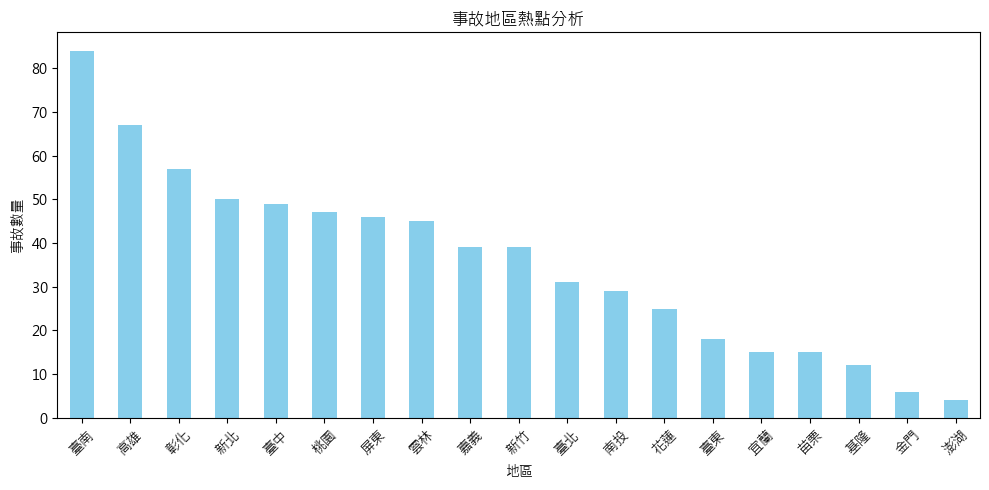

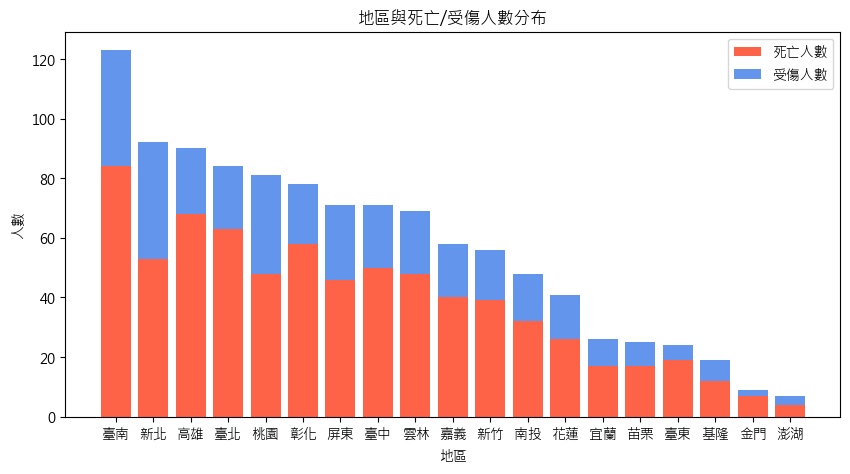

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 統計每個地區的事故數量
accident_counts = df['地區'].value_counts()

# 使用 Matplotlib 繪製柱狀圖
plt.figure(figsize=(10, 5))
accident_counts.plot(kind='bar', color='skyblue')
plt.title('事故地區熱點分析')
plt.xlabel('地區')
plt.ylabel('事故數量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('事故地區熱點分析.png', bbox_inches='tight')

# 分析地區與死亡/受傷人數的關係
location_counts = df.groupby('地區').agg({'死亡人數': 'sum', '受傷人數': 'sum'})

# 對總人數進行排序
location_counts['總人數'] = location_counts['死亡人數'] + location_counts['受傷人數']
location_counts = location_counts.sort_values('總人數', ascending=False)

# 繪製長條圖
plt.figure(figsize=(10, 5))
plt.bar(location_counts.index, location_counts['死亡人數'], label='死亡人數', color='tomato')
plt.bar(location_counts.index, location_counts['受傷人數'], bottom=location_counts['死亡人數'], label='受傷人數', color='cornflowerblue')
plt.xlabel('地區')
plt.ylabel('人數')
plt.title('地區與死亡/受傷人數分布')
plt.legend()
plt.savefig('地區與死亡受傷人數分布.png', bbox_inches='tight')

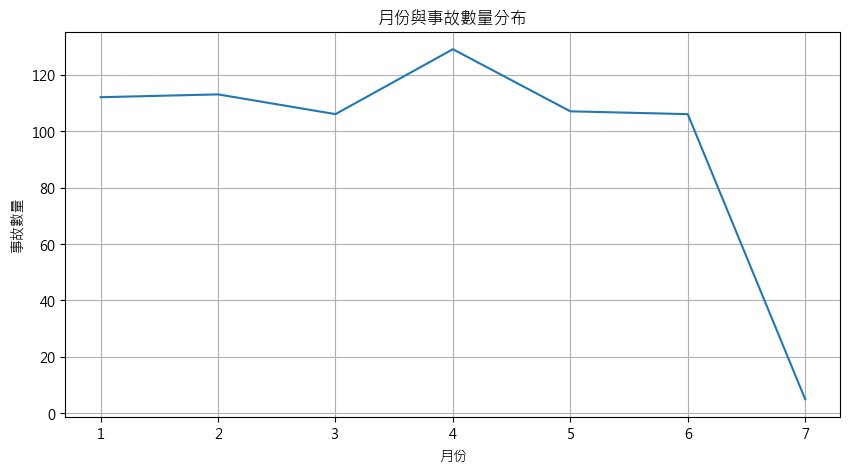

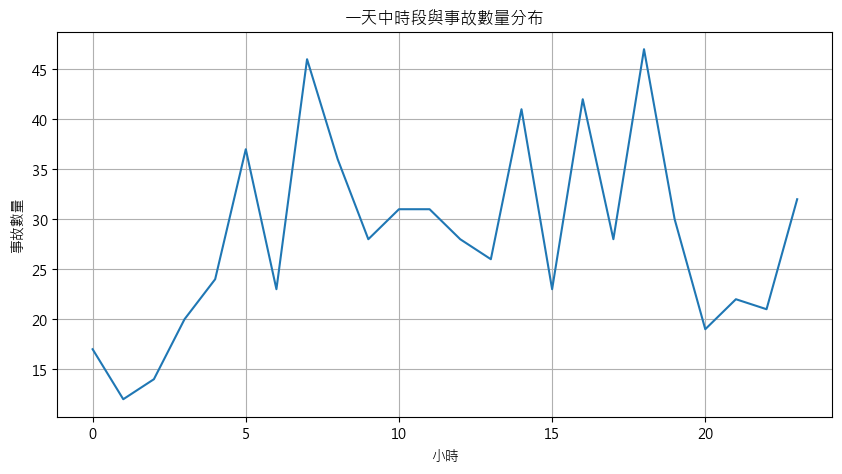

In [4]:
# 分析月份時間分布
month_counts = df['月份'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(month_counts.index, month_counts.values)
plt.xlabel('月份')
plt.ylabel('事故數量')
plt.title('月份與事故數量分布')
plt.grid(True)
plt.savefig('月份與事故數量分布.png', bbox_inches='tight')

# 分析一天中時段時間分布
hour_counts = df['小時'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(hour_counts.index, hour_counts.values)
plt.xlabel('小時')
plt.ylabel('事故數量')
plt.title('一天中時段與事故數量分布')
plt.grid(True)
plt.savefig('一天中時段與事故數量分布.png', bbox_inches='tight')

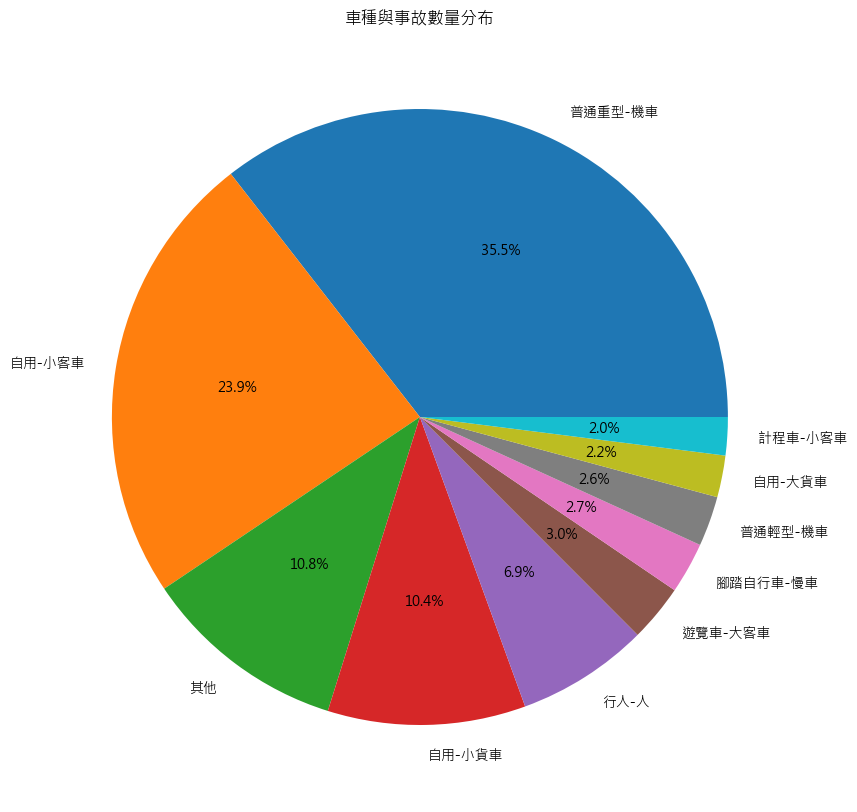

In [5]:
# 分割車種資料
df['車種'] = df['車種'].str.split(';')
df = df.explode('車種')

# 維護一個dict來記錄車種的事故數量
car_counts = df['車種'].value_counts()

# 計算每種車種的事故數量佔比
car_percentages = car_counts / car_counts.sum() * 100

# 將事故數量佔比小於2%的車種標記為'其他'
df['車種'] = df.apply(lambda x: x['車種'] if car_percentages[x['車種']] >= 2.0 else '其他', axis=1)

# 重新計算車種的事故數量
car_counts = df['車種'].value_counts()

# 繪製圓餅圖
plt.figure(figsize=(10, 10))
plt.pie(car_counts, labels=car_counts.index, autopct='%1.1f%%')
plt.title('車種與事故數量分布')
plt.savefig('車種與事故數量分布.png', bbox_inches='tight')

In [6]:
# 將DataFrame保存為Excel文件
df.to_excel('output_commute.xlsx', index=False)